In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [46]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('data/wine.csv',header = None, names = ['주석산 농도','아세트산 농도','구연산 농도','잔류 당분 농도','염화나트륨 농도','유리 아황산 농도','총 아황산 농도','밀도','ph','황산칼륨 농도','알코올 도수','와인의 맛','class'])
df.head(3)
df.shape

(6497, 13)

In [47]:
df_pre = pd.read_csv('data/wine.csv',header = None,
                     names = ['주석산 농도','아세트산 농도','구연산 농도','잔류 당분 농도','염화나트륨 농도','유리 아황산 농도','총 아황산 농도','밀도','ph','황산칼륨 농도','알코올 도수','와인의 맛','class'])
df = df_pre.sample(frac=0.15)

df.shape

(975, 13)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 6245 to 2308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   주석산 농도     975 non-null    float64
 1   아세트산 농도    975 non-null    float64
 2   구연산 농도     975 non-null    float64
 3   잔류 당분 농도   975 non-null    float64
 4   염화나트륨 농도   975 non-null    float64
 5   유리 아황산 농도  975 non-null    float64
 6   총 아황산 농도   975 non-null    float64
 7   밀도         975 non-null    float64
 8   ph         975 non-null    float64
 9   황산칼륨 농도    975 non-null    float64
 10  알코올 도수     975 non-null    float64
 11  와인의 맛      975 non-null    int64  
 12  class      975 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 106.6 KB


In [49]:
df.describe()

,주석산 농도,아세트산 농도,구연산 농도,잔류 당분 농도,염화나트륨 농도,유리 아황산 농도,총 아황산 농도,밀도,ph,황산칼륨 농도,알코올 도수,와인의 맛,class
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,7.199282,0.343979,0.315826,5.333128,0.058434,29.940513,113.162051,0.994687,3.219303,0.532615,10.473316,5.800000,0.264615
std,1.225679,0.161031,0.144833,4.811715,0.040195,17.127078,55.815845,0.003052,0.159532,0.156318,1.234354,0.876337,0.441355
min,4.700000,0.080000,0.000000,0.700000,0.009000,3.000000,6.000000,0.987220,2.790000,0.230000,8.400000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,73.500000,0.992245,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.800000,0.047000,28.000000,115.000000,0.995000,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.410000,0.390000,7.700000,0.068500,41.000000,153.000000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,14.300000,1.090000,0.990000,31.600000,0.415000,128.000000,289.000000,1.010300,3.780000,1.980000,14.000000,9.000000,1.000000


In [50]:
df.values

array([[ 5.9  ,  0.18 ,  0.28 , ..., 10.65 ,  7.   ,  0.   ],
       [10.2  ,  0.67 ,  0.39 , ..., 10.   ,  5.   ,  1.   ],
       [ 8.4  ,  0.715,  0.2  , ...,  9.4  ,  5.   ,  1.   ],
       ...,
       [ 5.8  ,  0.2  ,  0.34 , ..., 11.7  ,  5.   ,  0.   ],
       [ 5.8  ,  0.33 ,  0.2  , ...,  8.9  ,  5.   ,  0.   ],
       [ 6.2  ,  0.47 ,  0.21 , ...,  9.2  ,  5.   ,  0.   ]])

In [51]:
x = df.values[:,0:12]
y = df.values[:,12]

#### 모델 구조 생성  

In [52]:
model = Sequential()
model.add(Dense(30,input_dim=12, activation ='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#### 모델 컴파일 및 학습 

In [53]:
#모델 컴파일 
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])


from keras.callbacks import ModelCheckpoint
#모델 저장 폴더 지정 
MODEL_DIR = './model/' #현 폴더와 같은 공간에 model이라는 이름으로 저장 


if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

#모델 저장 방법 
model_path = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor ='val_loss',verbose=1, save_best_only=True)

#모델 학습
history = model.fit(x,y,validation_split=0.33, epochs=1500,batch_size=500)
history
model.summary()

Epoch 1/1500
2/2 [==============================] - 0s 136ms/step - loss: 2.0445 - accuracy: 0.7266 - val_loss: 1.3696 - val_accuracy: 0.7547
Epoch 2/1500
2/2 [==============================] - 0s 27ms/step - loss: 1.6065 - accuracy: 0.7193 - val_loss: 0.9768 - val_accuracy: 0.7547
Epoch 3/1500
2/2 [==============================] - 0s 25ms/step - loss: 1.1012 - accuracy: 0.7286 - val_loss: 0.6556 - val_accuracy: 0.7547
Epoch 4/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.7096 - accuracy: 0.7269 - val_loss: 0.7205 - val_accuracy: 0.6429
Epoch 5/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.7508 - accuracy: 0.5977 - val_loss: 0.8499 - val_accuracy: 0.4472
Epoch 6/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.8011 - accuracy: 0.5145 - val_loss: 0.5612 - val_accuracy: 0.7236
Epoch 7/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.5679 - accuracy: 0.7158 - val_loss: 0.4968 - val_accuracy: 0.7516
Epoch 8/1500

Epoch 59/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.2574 - accuracy: 0.9230 - val_loss: 0.2214 - val_accuracy: 0.9037
Epoch 60/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.2594 - accuracy: 0.9176 - val_loss: 0.2212 - val_accuracy: 0.9037
Epoch 61/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.2575 - accuracy: 0.9189 - val_loss: 0.2193 - val_accuracy: 0.9037
Epoch 62/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.2582 - accuracy: 0.9216 - val_loss: 0.2175 - val_accuracy: 0.9068
Epoch 63/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.2568 - accuracy: 0.9223 - val_loss: 0.2162 - val_accuracy: 0.9068
Epoch 64/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.2586 - accuracy: 0.9210 - val_loss: 0.2153 - val_accuracy: 0.9068
Epoch 65/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.2553 - accuracy: 0.9216 - val_loss: 0.2145 - val_accuracy: 0.9099
Epoch 

2/2 [==============================] - 0s 27ms/step - loss: 0.2020 - accuracy: 0.9301 - val_loss: 0.1973 - val_accuracy: 0.9224
Epoch 174/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.2024 - accuracy: 0.9294 - val_loss: 0.1918 - val_accuracy: 0.9286
Epoch 175/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1992 - accuracy: 0.9260 - val_loss: 0.1858 - val_accuracy: 0.9286
Epoch 176/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.2002 - accuracy: 0.9260 - val_loss: 0.1830 - val_accuracy: 0.9255
Epoch 177/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1971 - accuracy: 0.9273 - val_loss: 0.1830 - val_accuracy: 0.9255
Epoch 178/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1998 - accuracy: 0.9290 - val_loss: 0.1856 - val_accuracy: 0.9286
Epoch 179/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1931 - accuracy: 0.9300 - val_loss: 0.1903 - val_accuracy: 0.9255
Epoch 180/1500

2/2 [==============================] - 0s 27ms/step - loss: 0.1467 - accuracy: 0.9554 - val_loss: 0.1528 - val_accuracy: 0.9565
Epoch 288/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1500 - accuracy: 0.9534 - val_loss: 0.1483 - val_accuracy: 0.9565
Epoch 289/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1497 - accuracy: 0.9517 - val_loss: 0.1432 - val_accuracy: 0.9503
Epoch 290/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.1417 - accuracy: 0.9533 - val_loss: 0.1443 - val_accuracy: 0.9565
Epoch 291/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.1461 - accuracy: 0.9530 - val_loss: 0.1506 - val_accuracy: 0.9565
Epoch 292/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1453 - accuracy: 0.9547 - val_loss: 0.1501 - val_accuracy: 0.9565
Epoch 293/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.1454 - accuracy: 0.9530 - val_loss: 0.1430 - val_accuracy: 0.9503
Epoch 294/1500

2/2 [==============================] - 0s 26ms/step - loss: 0.1143 - accuracy: 0.9679 - val_loss: 0.1278 - val_accuracy: 0.9596
Epoch 402/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1179 - accuracy: 0.9716 - val_loss: 0.1244 - val_accuracy: 0.9627
Epoch 403/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1140 - accuracy: 0.9736 - val_loss: 0.1186 - val_accuracy: 0.9627
Epoch 404/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1151 - accuracy: 0.9645 - val_loss: 0.1182 - val_accuracy: 0.9627
Epoch 405/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1164 - accuracy: 0.9605 - val_loss: 0.1194 - val_accuracy: 0.9627
Epoch 406/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1195 - accuracy: 0.9625 - val_loss: 0.1222 - val_accuracy: 0.9627
Epoch 407/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1096 - accuracy: 0.9713 - val_loss: 0.1194 - val_accuracy: 0.9627
Epoch 408/1500

2/2 [==============================] - 0s 24ms/step - loss: 0.0945 - accuracy: 0.9723 - val_loss: 0.1082 - val_accuracy: 0.9627
Epoch 516/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0935 - accuracy: 0.9713 - val_loss: 0.1066 - val_accuracy: 0.9658
Epoch 517/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0977 - accuracy: 0.9679 - val_loss: 0.1088 - val_accuracy: 0.9627
Epoch 518/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0960 - accuracy: 0.9713 - val_loss: 0.1120 - val_accuracy: 0.9658
Epoch 519/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0900 - accuracy: 0.9750 - val_loss: 0.1075 - val_accuracy: 0.9658
Epoch 520/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0950 - accuracy: 0.9706 - val_loss: 0.1057 - val_accuracy: 0.9627
Epoch 521/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0938 - accuracy: 0.9699 - val_loss: 0.1076 - val_accuracy: 0.9658
Epoch 522/1500

2/2 [==============================] - 0s 26ms/step - loss: 0.0799 - accuracy: 0.9760 - val_loss: 0.0977 - val_accuracy: 0.9658
Epoch 630/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0750 - accuracy: 0.9780 - val_loss: 0.0984 - val_accuracy: 0.9658
Epoch 631/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0757 - accuracy: 0.9787 - val_loss: 0.1026 - val_accuracy: 0.9627
Epoch 632/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0821 - accuracy: 0.9720 - val_loss: 0.0985 - val_accuracy: 0.9658
Epoch 633/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0754 - accuracy: 0.9797 - val_loss: 0.0967 - val_accuracy: 0.9658
Epoch 634/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0777 - accuracy: 0.9750 - val_loss: 0.0996 - val_accuracy: 0.9658
Epoch 635/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0726 - accuracy: 0.9787 - val_loss: 0.1070 - val_accuracy: 0.9627
Epoch 636/1500

2/2 [==============================] - 0s 26ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.0922 - val_accuracy: 0.9689
Epoch 744/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0638 - accuracy: 0.9797 - val_loss: 0.0941 - val_accuracy: 0.9689
Epoch 745/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0646 - accuracy: 0.9774 - val_loss: 0.0965 - val_accuracy: 0.9689
Epoch 746/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0657 - accuracy: 0.9757 - val_loss: 0.0992 - val_accuracy: 0.9689
Epoch 747/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0667 - accuracy: 0.9757 - val_loss: 0.0943 - val_accuracy: 0.9689
Epoch 748/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0653 - accuracy: 0.9760 - val_loss: 0.0939 - val_accuracy: 0.9689
Epoch 749/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0650 - accuracy: 0.9740 - val_loss: 0.0967 - val_accuracy: 0.9720
Epoch 750/1500

2/2 [==============================] - 0s 25ms/step - loss: 0.0567 - accuracy: 0.9780 - val_loss: 0.0938 - val_accuracy: 0.9814
Epoch 858/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0584 - accuracy: 0.9760 - val_loss: 0.0894 - val_accuracy: 0.9720
Epoch 859/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 0.0898 - val_accuracy: 0.9720
Epoch 860/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0570 - accuracy: 0.9794 - val_loss: 0.0992 - val_accuracy: 0.9783
Epoch 861/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0548 - accuracy: 0.9774 - val_loss: 0.0907 - val_accuracy: 0.9720
Epoch 862/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0560 - accuracy: 0.9801 - val_loss: 0.0921 - val_accuracy: 0.9689
Epoch 863/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0567 - accuracy: 0.9780 - val_loss: 0.0913 - val_accuracy: 0.9720
Epoch 864/1500

2/2 [==============================] - 0s 26ms/step - loss: 0.0458 - accuracy: 0.9841 - val_loss: 0.0962 - val_accuracy: 0.9752
Epoch 972/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0476 - accuracy: 0.9784 - val_loss: 0.0961 - val_accuracy: 0.9752
Epoch 973/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0483 - accuracy: 0.9777 - val_loss: 0.0924 - val_accuracy: 0.9752
Epoch 974/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0921 - val_accuracy: 0.9752
Epoch 975/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0510 - accuracy: 0.9817 - val_loss: 0.0955 - val_accuracy: 0.9752
Epoch 976/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0468 - accuracy: 0.9774 - val_loss: 0.0920 - val_accuracy: 0.9752
Epoch 977/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0916 - val_accuracy: 0.9752
Epoch 978/1500

2/2 [==============================] - 0s 27ms/step - loss: 0.0519 - accuracy: 0.9821 - val_loss: 0.0966 - val_accuracy: 0.9783
Epoch 1086/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0436 - accuracy: 0.9828 - val_loss: 0.1046 - val_accuracy: 0.9752
Epoch 1087/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0472 - accuracy: 0.9797 - val_loss: 0.0955 - val_accuracy: 0.9783
Epoch 1088/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0428 - accuracy: 0.9831 - val_loss: 0.0937 - val_accuracy: 0.9752
Epoch 1089/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0449 - accuracy: 0.9848 - val_loss: 0.0935 - val_accuracy: 0.9752
Epoch 1090/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0424 - accuracy: 0.9872 - val_loss: 0.1034 - val_accuracy: 0.9783
Epoch 1091/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0479 - accuracy: 0.9787 - val_loss: 0.0995 - val_accuracy: 0.9814
Epoch 10

2/2 [==============================] - 0s 26ms/step - loss: 0.0396 - accuracy: 0.9845 - val_loss: 0.1007 - val_accuracy: 0.9783
Epoch 1143/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0419 - accuracy: 0.9841 - val_loss: 0.0941 - val_accuracy: 0.9752
Epoch 1144/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0945 - val_accuracy: 0.9720
Epoch 1145/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0480 - accuracy: 0.9821 - val_loss: 0.0940 - val_accuracy: 0.9783
Epoch 1146/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0409 - accuracy: 0.9851 - val_loss: 0.0986 - val_accuracy: 0.9814
Epoch 1147/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0412 - accuracy: 0.9824 - val_loss: 0.1108 - val_accuracy: 0.9752
Epoch 1148/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0491 - accuracy: 0.9824 - val_loss: 0.0933 - val_accuracy: 0.9783
Epoch 11

2/2 [==============================] - 0s 24ms/step - loss: 0.0384 - accuracy: 0.9878 - val_loss: 0.0943 - val_accuracy: 0.9752
Epoch 1200/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0394 - accuracy: 0.9848 - val_loss: 0.0948 - val_accuracy: 0.9783
Epoch 1201/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0404 - accuracy: 0.9848 - val_loss: 0.0953 - val_accuracy: 0.9783
Epoch 1202/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0379 - accuracy: 0.9875 - val_loss: 0.0966 - val_accuracy: 0.9783
Epoch 1203/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0366 - accuracy: 0.9851 - val_loss: 0.1004 - val_accuracy: 0.9783
Epoch 1204/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0403 - accuracy: 0.9828 - val_loss: 0.0973 - val_accuracy: 0.9783
Epoch 1205/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0376 - accuracy: 0.9875 - val_loss: 0.0962 - val_accuracy: 0.9752
Epoch 12

2/2 [==============================] - 0s 27ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0987 - val_accuracy: 0.9783
Epoch 1257/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0359 - accuracy: 0.9868 - val_loss: 0.0998 - val_accuracy: 0.9783
Epoch 1258/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0375 - accuracy: 0.9861 - val_loss: 0.0984 - val_accuracy: 0.9752
Epoch 1259/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0339 - accuracy: 0.9885 - val_loss: 0.0978 - val_accuracy: 0.9752
Epoch 1260/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0370 - accuracy: 0.9845 - val_loss: 0.0986 - val_accuracy: 0.9783
Epoch 1261/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0358 - accuracy: 0.9855 - val_loss: 0.0986 - val_accuracy: 0.9783
Epoch 1262/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0370 - accuracy: 0.9845 - val_loss: 0.0982 - val_accuracy: 0.9814
Epoch 12

Epoch 1313/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0371 - accuracy: 0.9855 - val_loss: 0.0975 - val_accuracy: 0.9783
Epoch 1314/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.0370 - accuracy: 0.9878 - val_loss: 0.0969 - val_accuracy: 0.9783
Epoch 1315/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0981 - val_accuracy: 0.9783
Epoch 1316/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0340 - accuracy: 0.9834 - val_loss: 0.1007 - val_accuracy: 0.9783
Epoch 1317/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.0959 - val_accuracy: 0.9752
Epoch 1318/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0355 - accuracy: 0.9865 - val_loss: 0.0975 - val_accuracy: 0.9783
Epoch 1319/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0374 - accuracy: 0.9834 - val_loss: 0.0966 - val_accuracy:

2/2 [==============================] - 0s 26ms/step - loss: 0.0309 - accuracy: 0.9882 - val_loss: 0.0945 - val_accuracy: 0.9814
Epoch 1427/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0279 - accuracy: 0.9919 - val_loss: 0.0960 - val_accuracy: 0.9783
Epoch 1428/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0280 - accuracy: 0.9892 - val_loss: 0.1029 - val_accuracy: 0.9783
Epoch 1429/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0345 - accuracy: 0.9861 - val_loss: 0.0974 - val_accuracy: 0.9783
Epoch 1430/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0307 - accuracy: 0.9885 - val_loss: 0.0955 - val_accuracy: 0.9783
Epoch 1431/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0307 - accuracy: 0.9878 - val_loss: 0.0963 - val_accuracy: 0.9783
Epoch 1432/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0309 - accuracy: 0.9889 - val_loss: 0.1005 - val_accuracy: 0.9752
Epoch 14

2/2 [==============================] - 0s 25ms/step - loss: 0.0285 - accuracy: 0.9889 - val_loss: 0.1002 - val_accuracy: 0.9783
Epoch 1484/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0288 - accuracy: 0.9895 - val_loss: 0.0997 - val_accuracy: 0.9783
Epoch 1485/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0279 - accuracy: 0.9878 - val_loss: 0.0988 - val_accuracy: 0.9783
Epoch 1486/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0303 - accuracy: 0.9878 - val_loss: 0.0986 - val_accuracy: 0.9783
Epoch 1487/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.1016 - val_accuracy: 0.9783
Epoch 1488/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0291 - accuracy: 0.9889 - val_loss: 0.0994 - val_accuracy: 0.9783
Epoch 1489/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0280 - accuracy: 0.9905 - val_loss: 0.0976 - val_accuracy: 0.9814
Epoch 14

동기식 처리는 말그대로 코드 한줄의 동작이 끝나면 다음 코드가 실행되는 구조    
반면 비동기는 코드를 우선 실행시키고 결과가 나오기 전에 우선 다음 코드를 실행    
=>콜백함수는 비동기 처리를 구현하는 하나의 방법

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

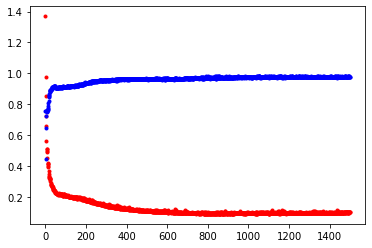

In [56]:
y_vloss = history.history['val_loss']
y_acc = history.history['val_accuracy']

# print(len(y_vloss))
x_len = np.arange(len(y_vloss))

plt.plot(x_len, y_vloss,'o',c='red',markersize=3) #빨간색 : 오차  
plt.plot(x_len, y_acc,'o',c='blue',markersize=3) #파란색 : 정확도 
plt.show()

In [63]:
#모델 컴파일 
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])


from keras.callbacks import ModelCheckpoint, EarlyStopping
#모델 저장 폴더 지정 
MODEL_DIR = './model/' #현 폴더와 같은 공간에 model이라는 이름으로 저장 


if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)


#모델 저장 방법 
model_path = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor ='val_loss',verbose=1, save_best_only=True)

# 학습 조기 종료 
early_stopping = EarlyStopping(monitor='val_loss',patience=100)


history = model.fit(x,y,validation_split=0.33, epochs=1500,batch_size=500, 
                    callbacks=[early_stopping, checkpointer])

history
model.summary()

Epoch 1/1500
2/2 [==============================] - 0s 133ms/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.1056 - val_accuracy: 0.9814

Epoch 00001: val_loss improved from inf to 0.10564, saving model to ./model\01-0.1056.hdf5
Epoch 2/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0270 - accuracy: 0.9889 - val_loss: 0.1290 - val_accuracy: 0.9752

Epoch 00002: val_loss did not improve from 0.10564
Epoch 3/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0752 - accuracy: 0.9743 - val_loss: 0.1238 - val_accuracy: 0.9814

Epoch 00003: val_loss did not improve from 0.10564
Epoch 4/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0561 - accuracy: 0.9801 - val_loss: 0.1044 - val_accuracy: 0.9783

Epoch 00004: val_loss improved from 0.10564 to 0.10442, saving model to ./model\04-0.1044.hdf5
Epoch 5/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.1288 - val_accuracy: 0.9720

E

2/2 [==============================] - 0s 27ms/step - loss: 0.0237 - accuracy: 0.9899 - val_loss: 0.1073 - val_accuracy: 0.9783

Epoch 00084: val_loss did not improve from 0.09961
Epoch 85/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.1090 - val_accuracy: 0.9752

Epoch 00085: val_loss did not improve from 0.09961
Epoch 86/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.0219 - accuracy: 0.9912 - val_loss: 0.1063 - val_accuracy: 0.9783

Epoch 00086: val_loss did not improve from 0.09961
Epoch 87/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0193 - accuracy: 0.9956 - val_loss: 0.1064 - val_accuracy: 0.9783

Epoch 00087: val_loss did not improve from 0.09961
Epoch 88/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.1056 - val_accuracy: 0.9783

Epoch 00088: val_loss did not improve from 0.09961
Epoch 89/1500
2/2 [=========================

*참고   
학습 조기 종료를 위해서는 ‘EarlyStopping’이라는 함수를 사용하며 더 이상 개선의 여지가 없을 때 학습을 종료시키는 콜백함수입니다. 콜백함수라는 것 어떤 함수를 수행 시 그 함수에서 내가 지정한 함수를 호출하는 것을 말하며, 여기서는 fit 함수에서 EarlyStopping이라는 콜백함수가 학습 과정 중에 매번 호출됩니다.

In [70]:
from keras.models import load_model

model= load_model('16-0.0996.hdf5')
df = pd.read_csv('data/wine.csv', header = None, 
                 names = ['주석산 농도','아세트산 농도','구연산 농도','잔류 당분 농도','염화나트륨 농도','유리 아황산 농도','총 아황산 농도','밀도','ph','황산칼륨 농도','알코올 도수','와인의 맛','class'])


x =df.values[:,0:12]
y =df.values[:,12]

model.evaluate(x,y)

204/204 [==============================] - 0s 440us/step - loss: 0.0777 - accuracy: 0.9792


[0.07768858969211578, 0.9792211651802063]

모델 불러오기
from tensorflow import keras model = keras.models.load_model(‘path/to/location’)

In [91]:
# 모델 불러오기
model_1 = tf.keras.models.load_model('./model/16-0.0996.hdf5')
model_1.summary()

# 예측하기
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('data/wine.csv', header=None)
np.random.seed(3)
tf.random.set_seed(3)
x = df.values[:, 0:12]
y = df.values[:,12]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=40)
model_1.fit(x_train, y_train, epochs=1500, batch_size=500)

# 테스트셋에 모델 적용
print('\n TEST ACCURACY: %.4f' % (model_1.evaluate(x_test,y_test)[1]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
10/10 [==============================] - 1s 886us/step - loss: 0.0633 - accuracy: 0.9798
Epoch 2/1500
10/10 [==============================] - 0s 886us/step - loss: 0.0623 - accuracy: 0.9800
Epoch 3/1500
10/10 [==============================

10/10 [==============================] - 0s 887us/step - loss: 0.0437 - accuracy: 0.9859
Epoch 151/1500
10/10 [==============================] - 0s 773us/step - loss: 0.0472 - accuracy: 0.9864
Epoch 152/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0433 - accuracy: 0.9853
Epoch 153/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0425 - accuracy: 0.9859
Epoch 154/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0402 - accuracy: 0.9859
Epoch 155/1500
10/10 [==============================] - 0s 997us/step - loss: 0.0409 - accuracy: 0.9861
Epoch 156/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0460 - accuracy: 0.9848
Epoch 157/1500
10/10 [==============================] - 0s 886us/step - loss: 0.0405 - accuracy: 0.9870
Epoch 158/1500
10/10 [==============================] - 0s 774us/step - loss: 0.0407 - accuracy: 0.9866
Epoch 159/1500
10/10 [==============================] - 0s 665us/step - loss: 0

Epoch 229/1500
10/10 [==============================] - 0s 886us/step - loss: 0.0494 - accuracy: 0.9853
Epoch 230/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0481 - accuracy: 0.9839
Epoch 231/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0405 - accuracy: 0.9866
Epoch 232/1500
10/10 [==============================] - 0s 884us/step - loss: 0.0407 - accuracy: 0.9872
Epoch 233/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0465 - accuracy: 0.9837
Epoch 234/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0448 - accuracy: 0.9846
Epoch 235/1500
10/10 [==============================] - 0s 554us/step - loss: 0.0420 - accuracy: 0.9864
Epoch 236/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0390 - accuracy: 0.9870
Epoch 237/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0401 - accuracy: 0.9857
Epoch 238/1500
10/10 [==============================] - 0s 776us

10/10 [==============================] - 0s 776us/step - loss: 0.0384 - accuracy: 0.9868
Epoch 386/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0373 - accuracy: 0.9870
Epoch 387/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0407 - accuracy: 0.9861
Epoch 388/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0386 - accuracy: 0.9877
Epoch 389/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0372 - accuracy: 0.9875
Epoch 390/1500
10/10 [==============================] - 0s 674us/step - loss: 0.0374 - accuracy: 0.9886
Epoch 391/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0369 - accuracy: 0.9872
Epoch 392/1500
10/10 [==============================] - 0s 773us/step - loss: 0.0363 - accuracy: 0.9877
Epoch 393/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0388 - accuracy: 0.9859
Epoch 394/1500
10/10 [==============================] - 0s 665us/step - loss: 0

Epoch 542/1500
10/10 [==============================] - 0s 886us/step - loss: 0.0346 - accuracy: 0.9894
Epoch 543/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0351 - accuracy: 0.9894
Epoch 544/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0354 - accuracy: 0.9879
Epoch 545/1500
10/10 [==============================] - 0s 886us/step - loss: 0.0345 - accuracy: 0.9877
Epoch 546/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0535 - accuracy: 0.9820
Epoch 547/1500
10/10 [==============================] - 0s 886us/step - loss: 0.0365 - accuracy: 0.9883
Epoch 548/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0357 - accuracy: 0.9894
Epoch 549/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0390 - accuracy: 0.9883
Epoch 550/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0349 - accuracy: 0.9879
Epoch 551/1500
10/10 [==============================] - 0s 665us

10/10 [==============================] - 0s 665us/step - loss: 0.0376 - accuracy: 0.9872
Epoch 699/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0336 - accuracy: 0.9897
Epoch 700/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0329 - accuracy: 0.9888
Epoch 701/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0377 - accuracy: 0.9872
Epoch 702/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0340 - accuracy: 0.9897
Epoch 703/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0354 - accuracy: 0.9881
Epoch 704/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0364 - accuracy: 0.9883
Epoch 705/1500
10/10 [==============================] - 0s 779us/step - loss: 0.0321 - accuracy: 0.9908
Epoch 706/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0354 - accuracy: 0.9890
Epoch 707/1500
10/10 [==============================] - 0s 884us/step - loss: 0

10/10 [==============================] - 0s 665us/step - loss: 0.0319 - accuracy: 0.9901
Epoch 855/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0305 - accuracy: 0.9914
Epoch 856/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0316 - accuracy: 0.9892
Epoch 857/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0324 - accuracy: 0.9899
Epoch 858/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0335 - accuracy: 0.9877
Epoch 859/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0305 - accuracy: 0.9903
Epoch 860/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0304 - accuracy: 0.9899
Epoch 861/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0308 - accuracy: 0.9905
Epoch 862/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0308 - accuracy: 0.9912
Epoch 863/1500
10/10 [==============================] - 0s 776us/step - loss: 0

10/10 [==============================] - 0s 773us/step - loss: 0.0290 - accuracy: 0.9914
Epoch 1011/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0280 - accuracy: 0.9919
Epoch 1012/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0282 - accuracy: 0.9908
Epoch 1013/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0271 - accuracy: 0.9916
Epoch 1014/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0337 - accuracy: 0.9888
Epoch 1015/1500
10/10 [==============================] - 0s 554us/step - loss: 0.0427 - accuracy: 0.9844
Epoch 1016/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0403 - accuracy: 0.9866
Epoch 1017/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0305 - accuracy: 0.9905
Epoch 1018/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0279 - accuracy: 0.9910
Epoch 1019/1500
10/10 [==============================] - 0s 665us/step 

10/10 [==============================] - 0s 887us/step - loss: 0.0256 - accuracy: 0.9910
Epoch 1167/1500
10/10 [==============================] - 0s 779us/step - loss: 0.0255 - accuracy: 0.9934
Epoch 1168/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0270 - accuracy: 0.9908
Epoch 1169/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0261 - accuracy: 0.9930
Epoch 1170/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0434 - accuracy: 0.9864
Epoch 1171/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0313 - accuracy: 0.9905
Epoch 1172/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0289 - accuracy: 0.9908
Epoch 1173/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0275 - accuracy: 0.9916
Epoch 1174/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0300 - accuracy: 0.9910
Epoch 1175/1500
10/10 [==============================] - 0s 887us/step 

10/10 [==============================] - 0s 665us/step - loss: 0.0273 - accuracy: 0.9921
Epoch 1323/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0273 - accuracy: 0.9912
Epoch 1324/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0267 - accuracy: 0.9914
Epoch 1325/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0308 - accuracy: 0.9905
Epoch 1326/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0286 - accuracy: 0.9908
Epoch 1327/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0261 - accuracy: 0.9925
Epoch 1328/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0258 - accuracy: 0.9927
Epoch 1329/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0301 - accuracy: 0.9901
Epoch 1330/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0250 - accuracy: 0.9919
Epoch 1331/1500
10/10 [==============================] - 0s 665us/step 

10/10 [==============================] - 0s 997us/step - loss: 0.0251 - accuracy: 0.9927
Epoch 1479/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0269 - accuracy: 0.9921
Epoch 1480/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0310 - accuracy: 0.9901
Epoch 1481/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0248 - accuracy: 0.9921
Epoch 1482/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0253 - accuracy: 0.9919
Epoch 1483/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0241 - accuracy: 0.9934
Epoch 1484/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0271 - accuracy: 0.9914
Epoch 1485/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0265 - accuracy: 0.9912
Epoch 1486/1500
10/10 [==============================] - 0s 665us/step - loss: 0.0283 - accuracy: 0.9903
Epoch 1487/1500
10/10 [==============================] - 0s 776us/step 